In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from helper.manage_orderbooks import extract_orderbooks_for_one_currencypair, load_orderbook_snapshot, plot_episode, OrderbookEpisodesGenerator
from helper.orderbook_container import OrderbookContainer
from helper.orderbook_trader import OrderbookTradingSimulator

In [3]:
filename = '/home/axel/data/small/obs_2016-11_USDT_BTC_maxVol100.dict'

# data = load_orderbook_snapshot(filename, last_line=120)

T = 4
period_length = 15
episode_windows = OrderbookEpisodesGenerator(filename=filename, episode_length=T*period_length)
print("Length of episode_windows: {}".format(len(episode_windows)))
print(len(episode_windows[0]))

Length of episode_windows: 541
60


In [47]:
data = list(episode_windows[:2])
data_cresc = list(episode_windows[17:18])

In [5]:
data[0][0]

OrderbookContainer from 2016-11-08T10:00 (factor: 1.0)
  107 bids (best: 705.0)
  110 asks (best: 705.450997)
price: 705.2254744655137
  kind: 'orderbook'

In [6]:
episode_windows[1][0]

OrderbookContainer from 2016-11-08T11:01 (factor: 1.0)
  110 bids (best: 704.5778597)
  121 asks (best: 706.0809733)
price: 705.329149561763
  kind: 'orderbook'

In [ ]:
plot_episode(episode_windows[0], volume=100, intervals=4)
plot_episode(episode_windows[1], volume=100, intervals=4)

#### Test Orderbook plot, print and compare_with

,Amount,Type
703.700000,0.001250,bid
705.000000,0.158232,bid
705.225474,NaN,center
705.450997,2.902181,ask
705.451000,0.270000,ask


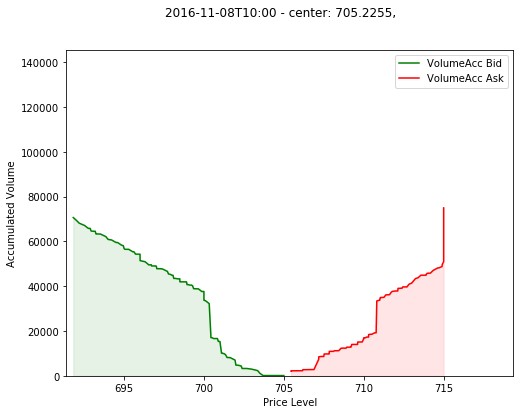

OrderbookContainer from 2016-11-08T10:00 (factor: 1.0)
  107 bids (best: 705.0)
  110 asks (best: 705.450997)
price: 705.2254744655137
  kind: 'orderbook'
OrderbookContainer from 2016-11-08T10:01 (factor: 1.0)
  105 bids (best: 703.8007878)
  111 asks (best: 705.4509968)
price: 704.6255702387916
  kind: 'orderbook'


In [7]:
orderbook = data[0][0]
orderbook2 = data[0][1]

display(orderbook.head(2))
orderbook.plot(range_factor=1.02)  # outfile='sample.pdf')
print(orderbook)
print(orderbook2)

In [ ]:
orderbook = data[0][0]
orderbook2 = data[0][1]

display(orderbook.head())
display(orderbook2.head())

print("\nCompare two orderbooks:")
diff = orderbook2.compare_with(other=orderbook)

display(diff.head(10))
print(diff)

#### Test get_current_price()

In [ ]:
display(orderbook.head(3))
vol = 10

for factor in [0.25, 0.5, 0.75, 1.]:
    res = orderbook.get_current_price(vol*factor)
    print("MarketOrderPrice for {} shares: {:1.4f} (worst price: {})".format(vol*factor, res[0], res[1]))

#### Test orderbook.head and tail

In [ ]:
display(orderbook.head(2))
display(orderbook.tail(2))

#### Test parameter limit

In [ ]:
len(episode_windows[0])
from time import sleep, perf_counter as pc

In [ ]:
import time
def timefunc(f):
    def f_timer(*args, **kwargs):
        start = time.time()
        result = f(*args, **kwargs)
        end = time.time()
        print(f.__name__, 'took', end - start, 'time')
        return result
    return f_timer

In [ ]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

@timing
def f(a):
    for _ in range(a):
        i = 0
    return -1

f(100)

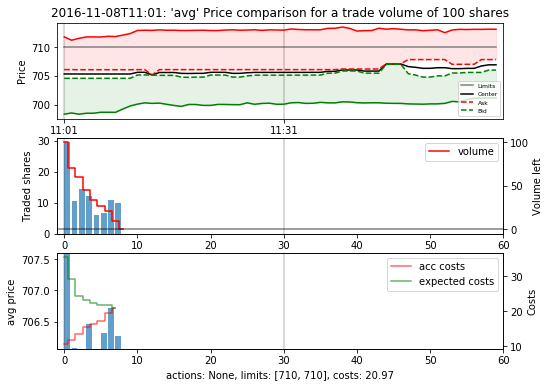

In [103]:
plot_episode(data[1], limits=[710, 710], volume=100)

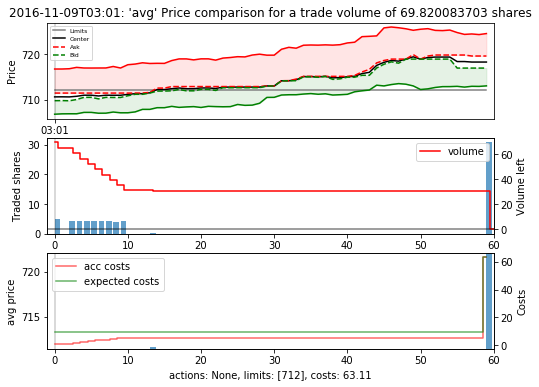

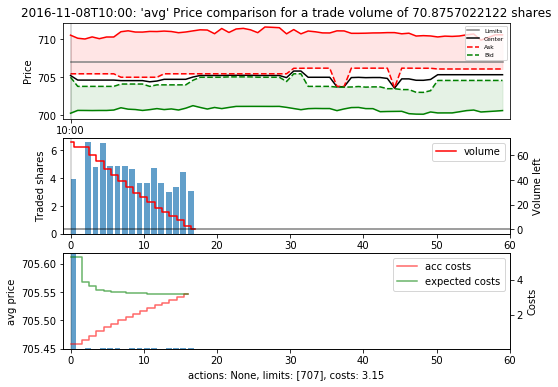

In [104]:
plot_episode(data_cresc[0], limits=[712], volume=69.820083702999995)
plot_episode(data[0], limits=[707], volume=70.875702212199997)

In [112]:
def test_trade(data, vol, cash, consume, limit):
    P = 15
    T = 4 
    
    ots = OrderbookTradingSimulator(orderbooks=data, volume=vol, cash=cash,
                                    tradingperiods=T, consume=consume, period_length=P)
    #init_shares = datasub[0].get_current_sharecount(cash=cash)
    for i in range(4):
        summary = ots.trade(limit=limit)
    
    display(ots.history)
    display(summary)
    #print(init_shares, init_shares-summary['traded'])

    return ots.history

test = test_trade(data=data_cresc[0], vol=0, cash=50000, consume='cash', limit=712)
test = test_trade(data=data[0], vol=0, cash=50000, consume='cash', limit=707)
#test_trade(data=data_cresc[0], vol=100, cash=0, consume='volume')

self.initial_limitAvg 716.712991711


,ASK,BID,CASH,CENTER,LIMIT,SPREAD,T,VOLUME,avg,cash_traded,cost,extra_shares,forced,high,initial_marketShares,low,volume_traded
2016-11-09T03:01,711.419498,709.740242,50000.0,710.579539,None,1.679257,15.0,0.000000,716.71299,-50000.0,0.0,-0.0,False,720.12,69.762932,711.419498,69.762932
2016-11-09T03:01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-69.762932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'cash_traded': -50000.0,
 'cost': 0.0,
 'done': True,
 'extra_shares': 0.0,
 'traded': 69.762932412599994}

self.initial_limitAvg 710.482308071


,ASK,BID,CASH,CENTER,LIMIT,SPREAD,T,VOLUME,avg,cash_traded,cost,extra_shares,forced,high,initial_marketShares,low,volume_traded
2016-11-08T10:00,705.450997,705.0,50000.0,705.225474,None,0.450997,15.0,0.000000,710.48231,-50000.0,0.0,-0.0,False,714.999998,70.374729,705.450997,70.374729
2016-11-08T10:00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-70.374729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'cash_traded': -50000.0,
 'cost': 0.0,
 'done': True,
 'extra_shares': 0.0,
 'traded': 70.374729155099999}

In [ ]:
data[1][0].get_current_sharecount(cash=50000)

In [ ]:
print(hist[['ASK', 'BID', 'CENTER', 'LIMIT', 'VOLUME', 'avg', 'cost', 'forced', 'high', 'volume_traded']].to_latex(float_format="%.3f"))

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    summary = ots.trade(limit=706, verbose=True)

display(ots.history)
display(summary)


#### Test parameter aggression_factor

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    action=0.9
    summary = ots.trade(agression_factor=action, verbose=True, extrainfo={'ACTION':action})
display(ots.history)